In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

In [30]:
df = pd.read_csv("dataset/train_data.txt")
df.shape 
test =pd.read_csv("dataset/test_data.txt")

In [46]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
1034    0
1035    0
1036    0
1037    0
1038    0
Name: 1.1, Length: 1039, dtype: int64

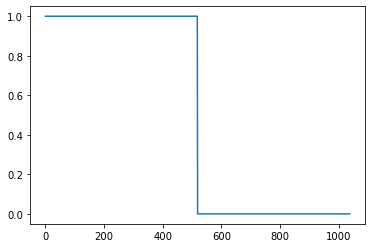

In [47]:

plt.plot(df.iloc[:,28])

c:\Users\Dell\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
26/26 [==============================] - 7s 74ms/step - loss: 0.6612 - accuracy: 0.6245 - val_loss: 0.8516 - val_accuracy: 0.0000e+00
Epoch 2/100
26/26 [==============================] - 0s 9ms/step - loss: 0.6210 - accuracy: 0.6245 - val_loss: 0.8619 - val_accuracy: 0.0000e+00
Epoch 3/100
26/26 [==============================] - 0s 9ms/step - loss: 0.5747 - accuracy: 0.6366 - val_loss: 0.7197 - val_accuracy: 0.3173
Epoch 4/100
26/26 [==============================] - 0s 9ms/step - loss: 0.5098 - accuracy: 0.7401 - val_loss: 0.5758 - val_accuracy: 0.8654
Epoch 5/100
26/26 [==============================] - 0s 13ms/step - loss: 0.4304 - accuracy: 0.8580 - val_loss: 0.4141 - val_accuracy: 0.9904
Epoch 6/100
26/26 [==============================] - 0s 9ms/step - loss: 0.3464 - accuracy: 0.9097 - val_loss: 0.2548 - val_accuracy: 1.0000
Epoch 7/100
26/26 [==============================] - 0s 9ms/step - loss: 0.2721 - accuracy: 0.9759 - val_loss: 0.1595 - val_accuracy: 1.0000
Epo

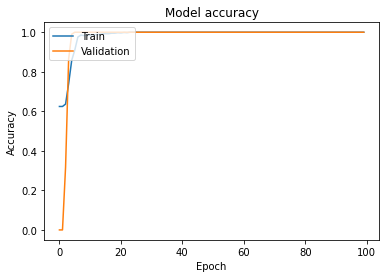

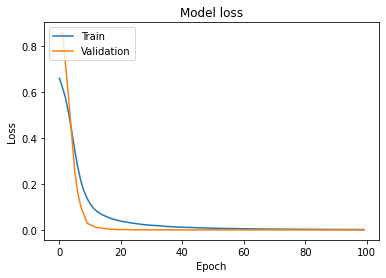

In [33]:
class Lstm:
    def __init__(self,train,test):
        self.train = train
        self.test = test
    def set_x_y(self):
        df =self.train
        features = df.columns[:-1]
        # Scale the data to be in the range [0, 1]
        scaler = MinMaxScaler(feature_range=(0, 1))
        df[features] = scaler.fit_transform(df[features])
        # Split the data into features and labels
        X = df[features].values
        y = df.iloc[:, -1].values
        timesteps = 1
        X = X.reshape(X.shape[0], timesteps, X.shape[1])
        return X,y
    def model(self):
        model = Sequential()
        X,y = self.set_x_y()
        model.add(LSTM(100, input_shape=(timesteps, X.shape[2])))
        model.add(Dense(1, activation='sigmoid'))
        # Compile the model
        optimizer = Adam(lr=0.001)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model
    def trin (self):
        model = self.model()
        X,y = self.set_x_y()
        history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
        # Plot the training accuracy
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()
        # Plot the training loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()
    
lstm1 = Lstm(df,df)   
lstm1.trin()

In [34]:
# Get the feature columns
features = df.columns[:-1]

# Scale the data to be in the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
df[features] = scaler.fit_transform(df[features])

# Split the data into features and labels
X = df[features].values
y = df.iloc[:, -1].values

In [35]:
# Reshape the data for LSTM
timesteps = 1
X = X.reshape(X.shape[0], timesteps, X.shape[1])

In [36]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(timesteps, X.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

c:\Users\Dell\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
26/26 [==============================] - 9s 68ms/step - loss: 0.6652 - accuracy: 0.6245 - val_loss: 0.8656 - val_accuracy: 0.0000e+00
Epoch 2/100
26/26 [==============================] - 0s 11ms/step - loss: 0.6259 - accuracy: 0.6245 - val_loss: 0.8347 - val_accuracy: 0.0000e+00
Epoch 3/100
26/26 [==============================] - 0s 10ms/step - loss: 0.5819 - accuracy: 0.6245 - val_loss: 0.7570 - val_accuracy: 0.1346
Epoch 4/100
26/26 [==============================] - 0s 9ms/step - loss: 0.5202 - accuracy: 0.7449 - val_loss: 0.6312 - val_accuracy: 0.7596
Epoch 5/100
26/26 [==============================] - 0s 13ms/step - loss: 0.4402 - accuracy: 0.8412 - val_loss: 0.4673 - val_accuracy: 0.9712
Epoch 6/100
26/26 [==============================] - 0s 14ms/step - loss: 0.3557 - accuracy: 0.9049 - val_loss: 0.2668 - val_accuracy: 1.0000
Epoch 7/100
26/26 [==============================] - 0s 11ms/step - loss: 0.2766 - accuracy: 0.9651 - val_loss: 0.1671 - val_accuracy: 1.0000

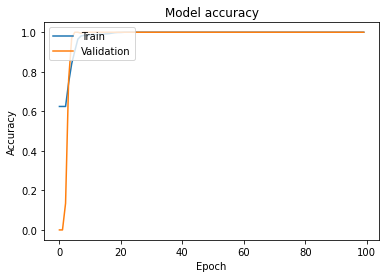

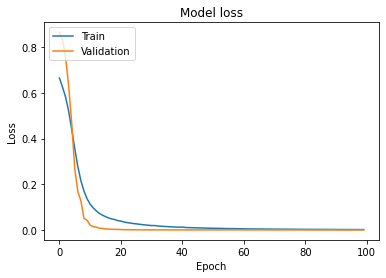

In [37]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
test_data = pd.read_csv("dataset/test_data.txt")
test_data= test_data.values
test_data = test_data.reshape(test_data.shape[0], 1, 28)

# Make predictions using the model
predictions = model.predict(test_data)

6/6 [==============================] - 1s 4ms/step


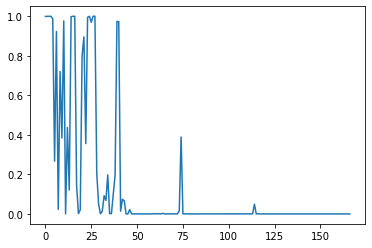

In [42]:
plt.plot(predictions)

In [40]:
len(test_data)

167

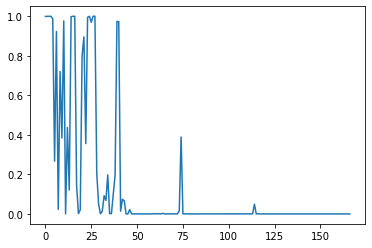

In [41]:
plt.plot(predictions)

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv("dataset/train_data.txt")

# Shuffle the rows of the dataset

# Split the dataset into input and output variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to fit into the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 28)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Get the predictions for the test set
y_pred = model.predict(X_test)

# Apply a threshold of 0.5 to get the final predictions as 0 or 1
y_pred = np.where(y_pred > 0.5, 1, 0)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Epoch 1/100
26/26 [==============================] - 2s 5ms/step - loss: 1.8774 - accuracy: 0.5584
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 0.8231 - accuracy: 0.7858
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3889 - accuracy: 0.8893
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 0.2688 - accuracy: 0.9278
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 0.2054 - accuracy: 0.9362
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 0.1419 - accuracy: 0.9471
Epoch 7/100
26/26 [==============================] - 0s 7ms/step - loss: 0.1086 - accuracy: 0.9735
Epoch 8/100
26/26 [==============================] - 0s 5ms/step - loss: 0.0992 - accuracy: 0.9699
Epoch 9/100
26/26 [==============================] - 0s 6ms/step - loss: 0.0730 - accuracy: 0.9832
Epoch 10/100
26/26 [==============================] - 0s 5ms/step - loss: 0.0652 - accuracy: 0.9819
Epoch 11/

In [64]:
print("Accuracy:", accuracy)

Accuracy: 0.5001386834319527


In [65]:
print("Predictions:", y_pred)


Predictions: [[1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [

In [51]:
data.shape

(1039, 29)

In [67]:
y_pred-y_test

array([[ 0,  1,  0, ...,  1,  1,  1],
       [-1,  0, -1, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  1,  1,  1],
       ...,
       [-1,  0, -1, ...,  0,  0,  0],
       [-1,  0, -1, ...,  0,  0,  0],
       [-1,  0, -1, ...,  0,  0,  0]], dtype=int64)

### try it out with Decision tree

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data into a Pandas dataframe
data = pd.read_csv('dataset/train_data.txt', header=None)
X = data.iloc[:, :-1] # Features
y = data.iloc[:, -1] # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the random forest classifier on the training data
rf.fit(X_train, y_train)

# Use the trained random forest classifier to make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the predictions
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1-score:', f1_score(y_test, y_pred, average='macro'))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [3]:
y_pred- y_test


136     0
628     0
184     0
31      0
677     0
       ..
543     0
617     0
60      0
841     0
1010    0
Name: 28, Length: 208, dtype: int64

In [4]:
np.unique(4)

array([4])

In [ ]:
y_train

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)